# Harmonic oscillator

<img src="./massonspring.png" alt="soae" style="width: 500px;"/>



$m\frac{d^2x}{dt^2} - B\frac{dx}{dt} + kx = 0$ <br>
- $x$ is displacement
- $t$ is time
- $B$ is damping
- $m$ is mass
- $k$ is stiffness


In [75]:
# Harmonic oscillator

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets


def HOfunction(y, t, B, m, k, A, wr):
    return (y[1], -(B/m)*y[1] - (k/m)*y[0] + (A/m)*np.sin(wr*t)) 


def update_mu(B=0):
    
    # parametery
    k = 1.0    # stiffness [N m]
    m = 1.0    # mass [kg]
    fD = 1.0*np.sqrt(k/m)/(2*np.pi)  # freq. (Hz) [expressed as fraction of resonant freq.]
    A = 0.00
    wr = 2*np.pi*fD



    # integration limits
    t0 = 0.0;   # Start value
    tf = 100.0   # Finish value
    dt = 0.01  # time step

    t = np.arange(t0,tf,dt)

    y0 = [0.1,0] # definitio
    ys = odeint(HOfunction, y0, t, args=(B, m, k, A, wr))
    
    fig, ax = plt.subplots(figsize=(13, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('dx/dt')
     
    ax.plot(ys[:,0], ys[:,1], lw=3, c='r')
        
    fig, ax = plt.subplots(figsize=(13, 6))
    ax.set_xlabel('time')
    ax.set_ylabel('x')
     
    ax.plot(t, ys[:,0], lw=3, c='r')
    plt.show()

    fig.canvas.draw()

widgets.interact(update_mu, B=(-1, 1, 0.01))



interactive(children=(FloatSlider(value=0.0, description='B', max=1.0, min=-1.0, step=0.01), Output()), _dom_c…

<function __main__.update_mu(B=0)>

# Harmonic oscillator driven by external force

$m\frac{d^2x}{dt^2} - B\frac{dx}{dt} + kx = F_t$ <br>
- $F_t$ is force as a function of time

### Solution in the frequency domain

$m(-\omega^2)\hat{x} + Bj\omega \hat{x} + k\hat{x} = \hat{F}$ 

$\hat{x} = \frac{\hat{F}}{m(-\omega^2) + Bj\omega + k}$


### Impedance

$\hat{Z} = \frac{\hat{F}}{\hat{v}} = \frac{\hat{F}}{j\omega\hat{x}}$

$\hat{Z} = \frac{\hat{F}}{\frac{j\omega\hat{F}}{m(-\omega^2) + Bj\omega + k}} = B - j[k/\omega + m(-\omega)]$


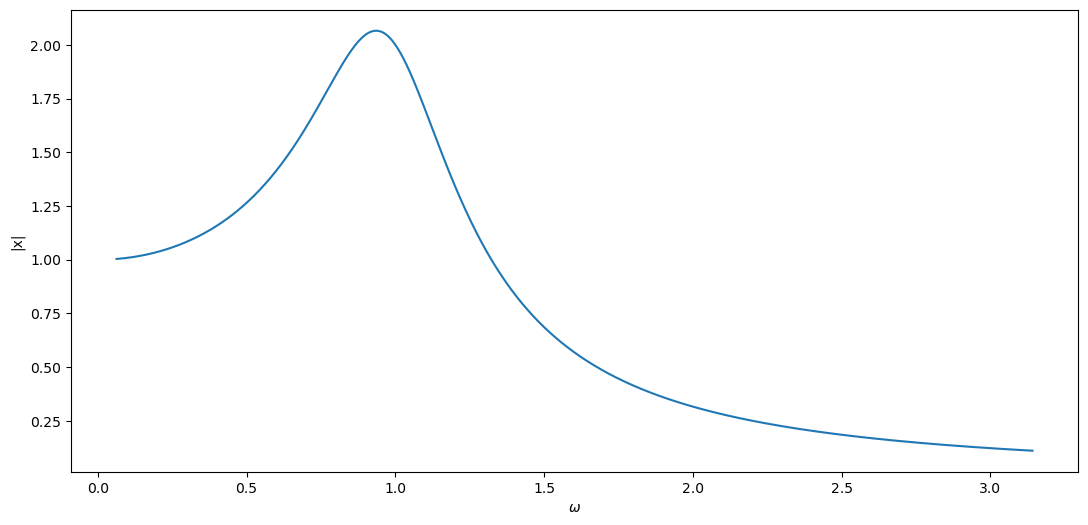

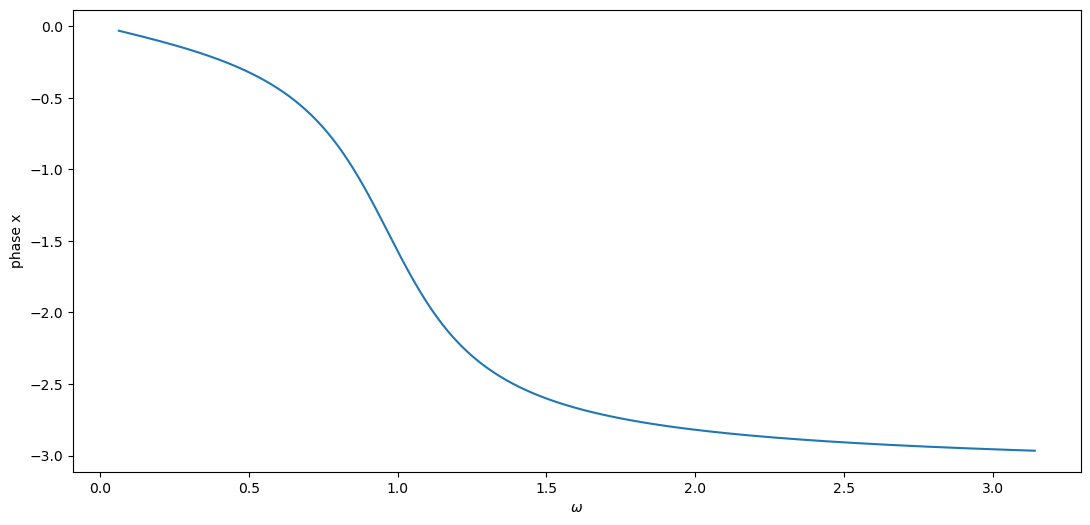

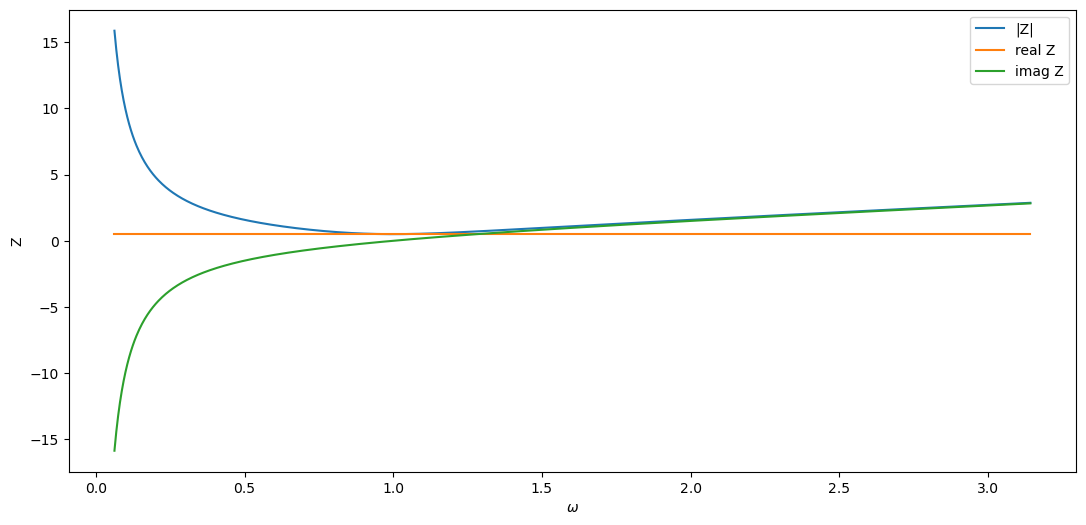

In [104]:
# impedance 

k = 1.0   # stiffness [N m]
m = 1.0    # mass [kg]
B = 0.5  # damping


omega_x = 2*np.pi*np.linspace(0.01,0.5,1000)

omega = omega_x
jomega = omega*1.j
F = 1

x = F/(m*(-omega**2) + jomega*B + k)

Z = F/(jomega*x)


#x2 = (F)/(m*(-omega**2) + jomega*mu + k - 0.2*(-omega**2)/(-omega**2 + jomega*mu + k2))

#Z = (F)/(jomega*x2)
Z2 = B - 1.j*(k/omega+m*(-omega))

#Z = (F+Fud)/(jomega*x)

fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(omega_x,np.abs(x))
ax.set_xlabel('$\omega$')
ax.set_ylabel('|x|')

fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(omega_x,np.angle(x))
ax.set_xlabel('$\omega$')
ax.set_ylabel('phase x')



fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(omega_x,np.abs(Z))
ax.plot(omega_x,np.real(Z),)
ax.plot(omega_x,np.imag(Z),)
ax.set_xlabel('$\omega$')
ax.set_ylabel('Z')
ax.legend(('|Z|','real Z','imag Z'))





# Harmonic oscillator driven by external force and undamping feedback force

$m\frac{d^2x}{dt^2} - B\frac{dx}{dt} + kx = F_t + F_u$ <br>
- $F_t$ is driving force as a function of time
- $F_u$ is undamping feedback force a function of time

### Solution in the frequency domain

$m(-\omega^2)\hat{x} + Bj\omega \hat{x} + k\hat{x} = \hat{F} + \hat{F}_u$ 

$\hat{F}_u = U\hat{y}$

$m_u(-\omega^2)\hat{y} + B_uj\omega \hat{y} + k_u\hat{y} = (-\omega^2)\hat{x}$ 

$\hat{y} = \frac{(-\omega^2)\hat{x}}{m_u(-\omega^2)\hat{y} + B_uj\omega \hat{y} + k_u\hat{y}}$


$\hat{x} = \frac{\hat{F}}{m(-\omega^2) + Bj\omega + k - U\frac{(-\omega^2)\hat{x}}{m_u(-\omega^2)\hat{y} + B_uj\omega \hat{y} + k_u\hat{y}}}$



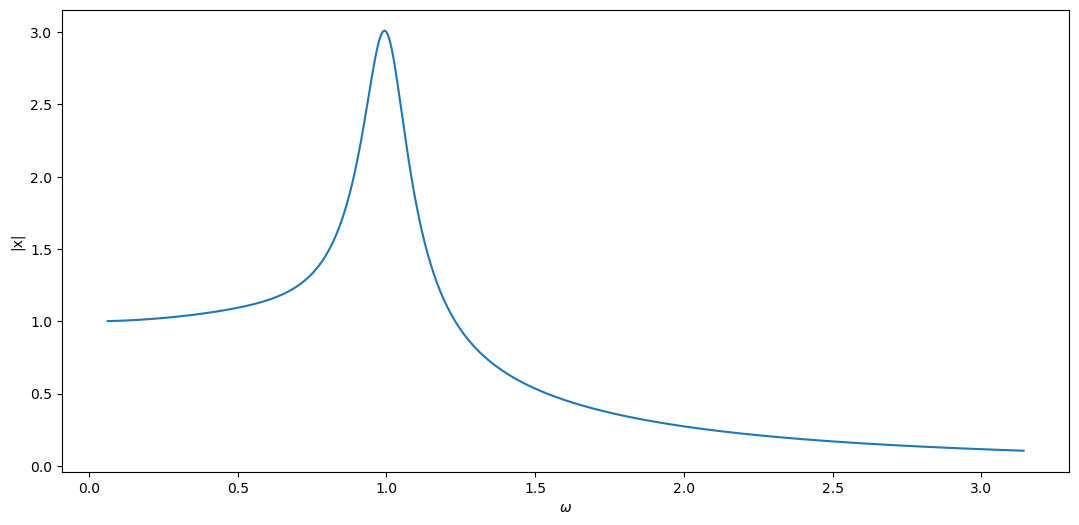

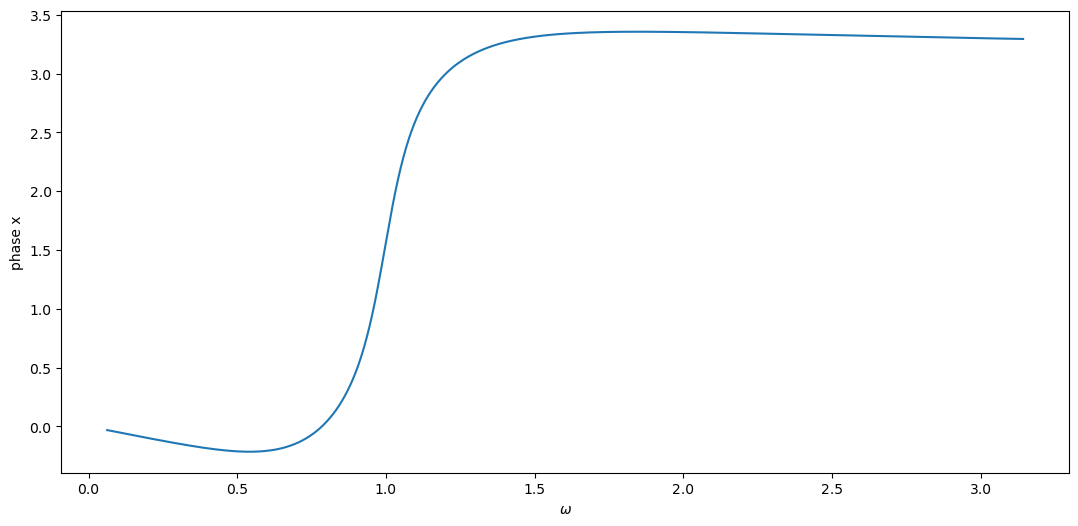

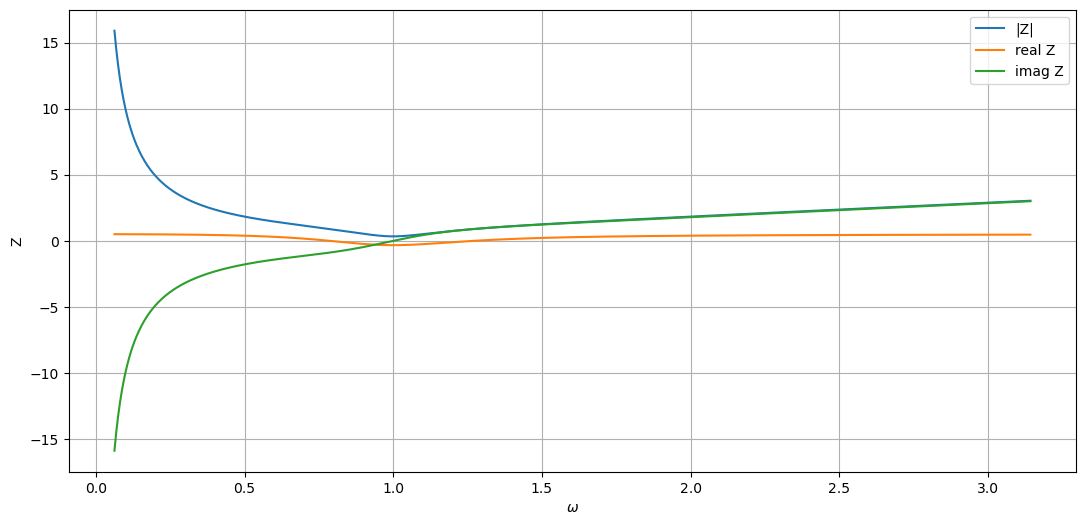

In [123]:
# impedance 

k = 1.0   # stiffness [N m]
m = 1.0    # mass [kg]
B = 0.5  # damping

ku = k
mu = m
Bu = 1.2*B
U = 0.5

omega_x = 2*np.pi*np.linspace(0.01,0.5,1000)

omega = omega_x
jomega = omega*1.j
F = 1


#x = F/(m*(-omega**2) + jomega*B + k)



x = (F)/(m*(-omega**2) + jomega*B + k - U*(-omega**2)/(-omega**2*mu + jomega*Bu + ku))

Z = F/(jomega*x)


#Z = (F)/(jomega*x2)

#Z = (F+Fud)/(jomega*x)

fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(omega_x,np.abs(x))
ax.set_xlabel('$\omega$')
ax.set_ylabel('|x|')

fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(omega_x,np.unwrap(np.angle(x)))
ax.set_xlabel('$\omega$')
ax.set_ylabel('phase x')

fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(omega_x,np.abs(Z))
ax.plot(omega_x,np.real(Z),)
ax.plot(omega_x,np.imag(Z),)
ax.set_xlabel('$\omega$')
ax.set_ylabel('Z')
ax.legend(('|Z|','real Z','imag Z'))
ax.grid()


